In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import xarray as xr
pylab.rcParams['figure.figsize'] = (16., 9.)
#%matplotlib inline
from utils import constants as cnst

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [4]:
cut_file = xr.open_dataset(cnst.CP4_PATH + '/CLOVER/CP4_18UTC_5000km2_-50_5-20N/1999-03-21_18:30:00_16.nc')

In [22]:
cut_file

<xarray.Dataset>
Dimensions:        (latitude: 21, longitude: 28)
Coordinates:
  * latitude       (latitude) float32 6.679502 6.7200017 ... 7.449002 7.489502
  * longitude      (longitude) float32 1.3389893 1.3795166 ... 2.432495
    time           datetime64[ns] 1999-03-21T18:30:00
Data variables:
    lw_out_PBLtop  (latitude, longitude) float64 nan nan nan nan ... nan nan nan
    lsRain         (latitude, longitude) float64 nan nan nan nan ... nan nan nan
    shear          (latitude, longitude) float64 ...
    u_mid          (latitude, longitude) float64 ...
    u_srfc         (latitude, longitude) float64 ...
    q_pl           (latitude, longitude) float64 ...
    theta          (latitude, longitude) float64 ...
    t_pl           (latitude, longitude) float64 ...

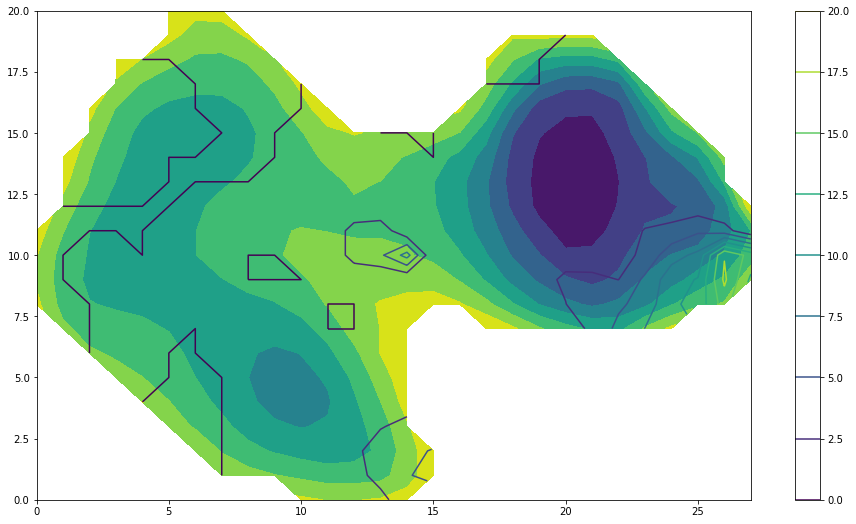

In [42]:
plt.figure()
plt.contourf(cut_file['lw_out_PBLtop'])
plt.contour(cut_file['lsRain'])
plt.colorbar()

In [190]:
lwout_file = xr.open_dataset(cnst.CP4_PATH + '/CLOVER/CP4hist/lw_out_PBLtop/lw_out_PBLtop_fullPL_A1hr_mean_ag057_4km_199903220030-199903222330.nc')

In [191]:
lsrain = xr.open_dataset(cnst.CP4_PATH + '/CLOVER/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ag057_4km_199903220030-199903222330.nc')

In [192]:
lw = lwout_file['lw_out_PBLtop'][lwout_file['time.hour']==18].squeeze()
rain = lsrain['lsRain'][lsrain['time.hour']==18].squeeze()

In [193]:
lwsmall= lw.sel(latitude=slice(6,9), longitude=slice(0,3))
rain= rain.sel(latitude=slice(6,9), longitude=slice(0,3))

In [194]:
lwsmall

<xarray.DataArray 'lw_out_PBLtop' (latitude: 74, longitude: 74)>
array([[-1538, -1512, -1460, ...,  -830,  -829,  -838],
       [-1480, -1433, -1359, ...,  -818,  -814,  -820],
       [-1427, -1372, -1278, ...,  -808,  -805,  -807],
       ...,
       [-1210, -1489, -1811, ...,  -796,  -826,  -843],
       [-1284, -1654, -1981, ...,  -799,  -826,  -833],
       [-1290, -1652, -2014, ...,  -810,  -838,  -851]])
Coordinates:
    time                     datetime64[ns] 1999-03-22T18:30:00
  * latitude                 (latitude) float32 6.0112495 6.05175 ... 8.967751
  * longitude                (longitude) float32 0.022735596 ... 2.979248
    forecast_period          timedelta64[ns] ...
    forecast_reference_time  datetime64[ns] ...
Attributes:
    standard_name:    toa_outgoing_longwave_flux
    units:            W m-2
    um_stash_source:  m01s03i332
    um_runid:         ag057
    um_streamid:      apa
    um_version:       10.3
    cell_methods:     time: mean (interval: 1 hour)
    

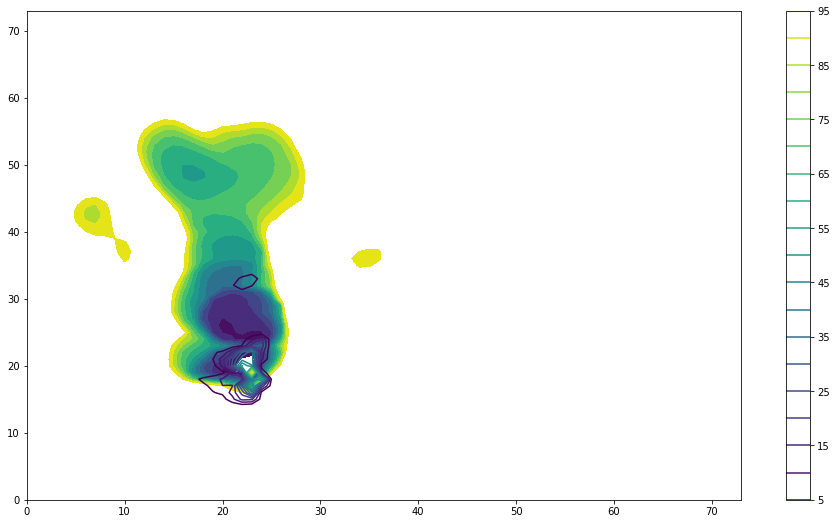

In [196]:
plt.contourf(lwsmall/100, levels=np.arange(-75,-50,2))
plt.contour(rain*3600, levels=np.arange(5,100,5))
plt.colorbar()

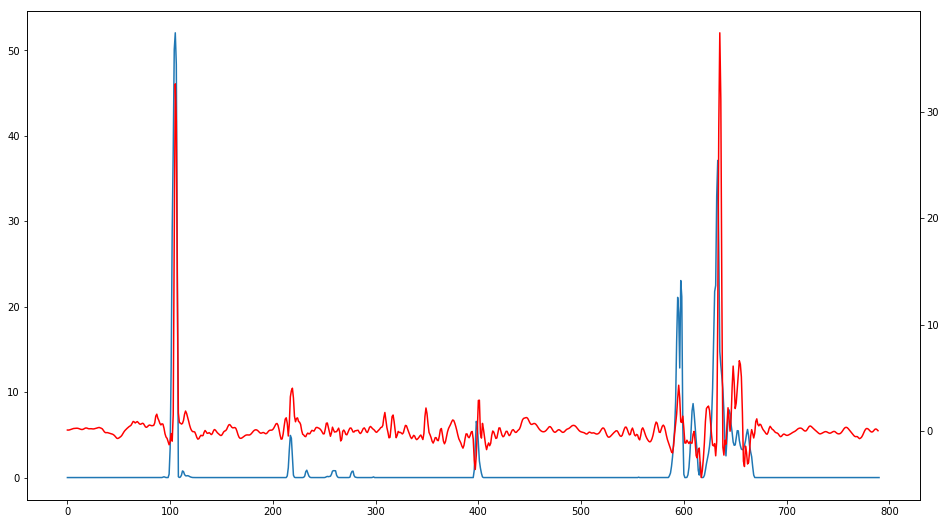

In [80]:
f=plt.figure()
ax = f.add_subplot(111)
ax.plot(rainplot)
ax1 = ax.twinx()
ax1.plot(omplot*-1, color='r')

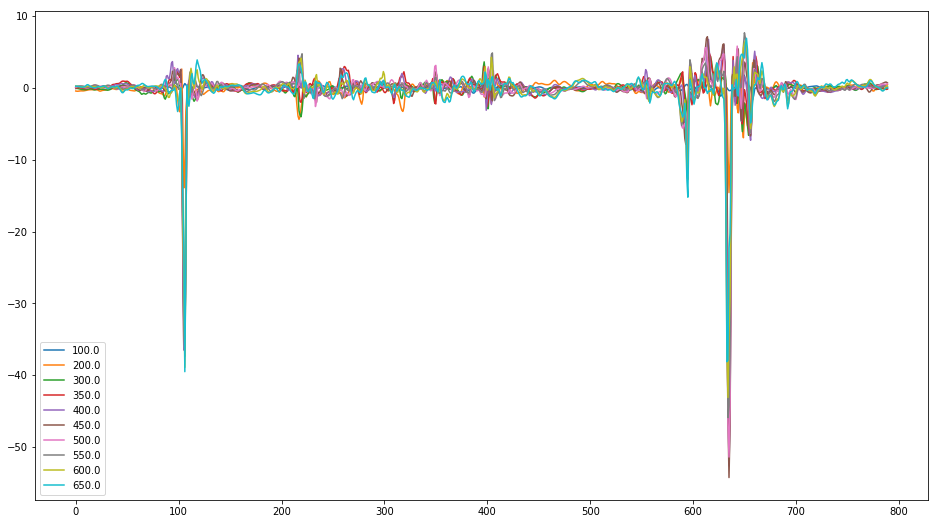

In [67]:
plt.figure()
for l in range(10):
    lab = omega.pressure.values[l]
    plt.plot(omega['omega_pl'][4,l,44,:], label=str(lab))
    
plt.legend()    
plt.show()